In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

folder = "./sim_results/"

plt.rcParams["figure.autolayout"] = True

Flow_min_value = 1
Flow_max_value = 4
Step = 1
configs_txt = ["RU.1 C", "RU.1 U","RU.2 C", "RU.2 U", "RU.3 C", "RU.3 U", "RU.4 C", "RU.4 U"]
Configs = np.arange(Flow_min_value, Flow_max_value + Step, Step)
Nsim = 1
delay = pd.DataFrame()

for conf in Configs:
    # Read data into pandas DataFrames
    CTx = pd.read_csv(f"{folder}TxFileControl{conf}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    UTx = pd.read_csv(f"{folder}TxFileUser{conf}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    CRx = pd.read_csv(f"{folder}RxFileControl{conf}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    URx = pd.read_csv(f"{folder}RxFileUser{conf}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])


    
    delay[configs_txt[2*(conf-1)]] = URx[:]["Time"].values - UTx[:]["Time"].values


    delay[configs_txt[2*(conf-1)+1]] = CRx[:]["Time"].values - CTx[:]["Time"].values

# Set a custom color palette
colors = plt.cm.Set3.colors

# Boxplot with enhanced style
bp = plt.boxplot(
    delay.values * 1e3,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (ms)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

folder = "./sim_results/"

plt.rcParams["figure.autolayout"] = True

Flow_min_value = 1
Flow_max_value = 4
Step = 1
configs_txt = ["RU.1 C", "RU.1 U","RU.2 C", "RU.2 U", "RU.3 C", "RU.3 U", "RU.4 C", "RU.4 U"]
Configs = np.arange(Flow_min_value, Flow_max_value + Step, Step)
Nsim = 1
delay_data = []

for conf in Configs:
    # Read data into pandas DataFrames
    CTx = pd.read_csv(f"{folder}TxFileControl{conf}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    UTx = pd.read_csv(f"{folder}TxFileUser{conf}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    CRx = pd.read_csv(f"{folder}RxFileControl{conf}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    URx = pd.read_csv(f"{folder}RxFileUser{conf}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

    delay_user = URx["Time"].values - UTx["Time"].values
    delay_control = CRx["Time"].values - CTx["Time"].values

    delay_data.append((delay_user, delay_control))

# Set a custom color palette
colors = plt.cm.Set3.colors

# Boxplot with enhanced style
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bp = plt.boxplot(
    [data * 1e3 for data, _ in delay_data],
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (ms)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: './sim_results/TxFileControl4.log'

1
2
3


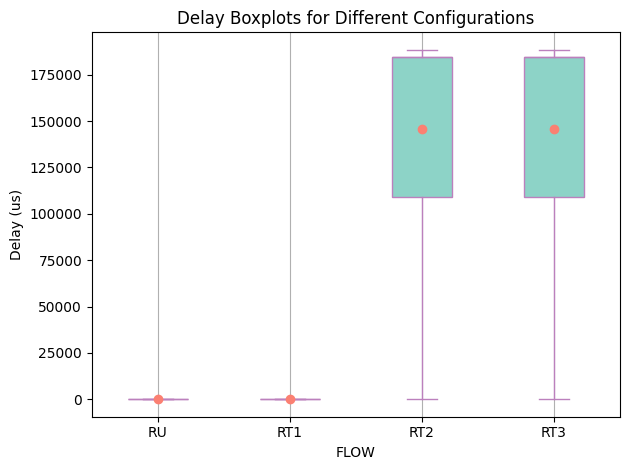

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/"
plt.rcParams["figure.autolayout"] = True

Flow_min_value = 1
Flow_max_value = 4
RU = 3
Step = 1
configs_txt = ["RU", "RT1", "RT2", "RT3"]
Flows = np.arange(Flow_min_value, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
Nsim = 1
delay = []
delay_aux = [] 
for flow in Flows:
    # Read data into pandas DataFrames
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

            # Calculate delay for user and control configurations
            delay_user = URx["Time"].values - UTx[:len(URx["Time"].values)]["Time"].values
            delay_control = CRx["Time"].values - CTx[:len(CRx["Time"].values)]["Time"].values
            # Assign values to the corresponding columns in the delay DataFrame
            delay_aux = np.concatenate([delay_user, delay_control])
        delay.append(delay_aux)
    else: 
        Tx = pd.read_csv(f"{folder}TxFile{flow + ru -1}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
        Rx = pd.read_csv(f"{folder}RxFile{flow + ru -1}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
        delay_rt = Rx["Time"].values - Tx[:len(Rx)]["Time"].values
        # Assign values to the corresponding columns in the delay DataFrame
        delay.append(delay_rt)

    

# Boxplot with enhanced style
delay_us = [arr*1e6 for arr in delay]    
   
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()


In [ ]:
# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay*1e6} us")

In [ ]:
# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay*1e6} us")


    

# Plotting the mean delays as a bar graph
plt.bar(configs_txt, mean_delays, color=colors[3])

# Adding labels and title
plt.ylabel("Mean Delay (s)")
plt.xlabel("Configuration")
plt.title("Mean Delay for Different Configurations")

# Show the plot
plt.show()

In [ ]:
# Plotting the mean delays as a bar graph with logarithmic scale
plt.bar(configs_txt, mean_delays, color=colors[3])

# Setting y-axis scale to logarithmic
plt.yscale('log')

# Adding labels and title
plt.ylabel("Mean Delay (s)")
plt.xlabel("Configuration")
plt.title("Mean Delay for Different Configurations")

# Show the plot
plt.show()
